In [17]:
%matplotlib widget
from spheres import *
from spheres.beams import *

#spin = qt.basis(3,2)
#spin = spin_coherent(3, [1, np.pi/4, np.pi/4], from_spherical=True)
#star = sph_xyz([1, np.pi/4, np.pi/4])
star = np.array([0,1,0])
spin = xyz_spin([star, star, star, star, star, star])
beam = spin_beam(spin)

viz_beam(beam, size=5, n_samples=120)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

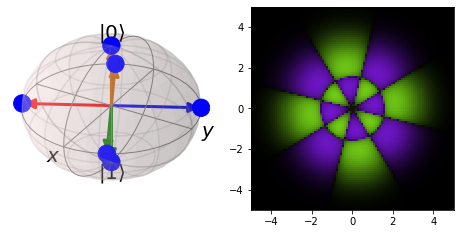

In [17]:

from spheres import *
from spheres.beams import *

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from spheres.stars import *

def animate_spin_beam(spin, H, dt=0.1, T=100, beam_size=5, n_beamsamples=100, filename=None):
    fig = plt.figure(figsize=plt.figaspect(0.5))

    bloch_ax = fig.add_subplot(1, 2, 1, projection='3d')
    sphere = qt.Bloch(fig=fig, axes=bloch_ax)
    sphere.point_size=[300]*(spin.shape[0]-1)
    sphere.make_sphere()

    beam_ax = fig.add_subplot(1, 2, 2)
    x = np.linspace(-beam_size, beam_size, n_beamsamples)
    y = np.linspace(-beam_size, beam_size, n_beamsamples)
    X, Y = np.meshgrid(x, y)

    U = (-1j*H*dt).expm()
    sphere_history = []
    beam_history = []
    for t in range(T):
        sphere_history.append(spin_xyz(spin))
        beam = spin_beam(spin)
        beam_history.append(np.array([[beam(x_, y_, 0) for y_ in y] for x_ in x]))
        spin = U*spin

    sphere.make_sphere()
    im = beam_ax.imshow(colorize(beam_history[0]), interpolation="none", extent=(-beam_size,beam_size,-beam_size,beam_size))
    def anim(i):
        sphere.clear()
        sphere.add_points(sphere_history[i].T)
        sphere.add_vectors(sphere_history[i])
        sphere.make_sphere()

        im.set_array(colorize(beam_history[i])) 
        return [bloch_ax, im]

    ani = animation.FuncAnimation(fig,\
                                  anim,\
                                  range(T),\
                                  repeat=False)
    if filename:
        ani.save(filename, fps=20)
    return ani

j = 3
d = int(2*j+1)
spin = xyz_spin([np.array([1,0,0]), np.array([-1,0,0]), np.array([0,1,0]), np.array([0,-1,0]), np.array([0,0,1]), np.array([0,0,-1])])
H = qt.jmat(j, 'z')
ani = animate_spin_beam(spin, H, T=100, filename="beam6star_z.mp4")

